In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# 데이터 불러오기
data = load_breast_cancer(as_frame=True)

In [ ]:
# 데이터 프레임 출력
print(data.frame)

In [5]:
# 입력 부분과 목표 값 출력
print(data.data)
print(data.target)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [6]:
# 데이터 세트 개요 
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
# 데이터 구조 특성 이름과 목표 변수 이름
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


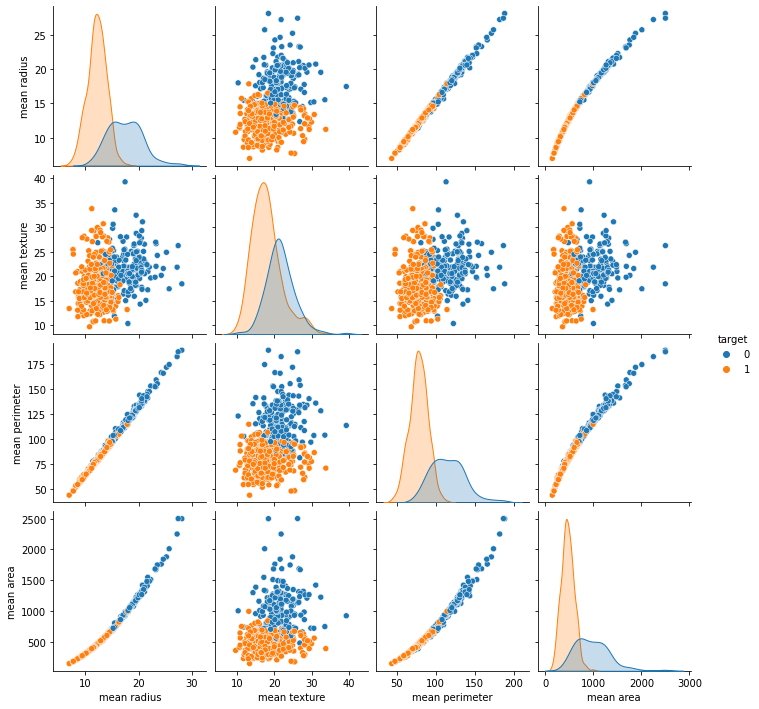

In [8]:
# 변수 간 산포도
data_mean = data.frame[['mean radius','mean texture','mean perimeter',
                        'mean area', 'target']]
sns.pairplot(data_mean, hue='target')

In [9]:
# 학습용과 테스트 데이터 분리
X_train,X_test,y_train,y_test=train_test_split(data.data, data.target, test_size=0.3, 
                                               random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [10]:
# 피처 스케일링: 학습 데이터 
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

[[-1.53753797 -0.55554819 -1.51985982 ... -1.73344373 -0.77142494
   0.22129607]
 [-0.79609663 -0.38603656 -0.81356785 ... -0.43011095  0.08970515
  -0.36303452]
 [ 0.21752653 -0.38603656  0.18557689 ...  0.76443594  0.80894448
  -0.67502531]
 ...
 [-0.48269225 -0.14686262 -0.46083202 ... -0.21253919  0.1565732
   0.16129784]
 [ 1.14079887 -0.12364185  1.14739725 ...  0.25197353  0.1679897
  -0.23677737]
 [-0.41210568 -1.26610378 -0.43253113 ... -0.78299078 -0.89537548
  -0.79241315]]


In [11]:
# 피처 스케일링: 테스트 데이터
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[-0.70856928  0.18287232 -0.70200489 ... -0.5167201   0.46971142
   0.26564259]
 [-0.95421055 -2.21118915 -0.9661466  ... -1.04371727 -1.35040445
  -0.38703381]
 [-0.48833918 -0.6553975  -0.38864423 ...  0.27744681  0.51048462
   0.99083859]
 ...
 [-0.45163416 -0.19330417 -0.51251192 ... -1.60200162 -0.67356925
  -1.04857951]
 [-0.45728109 -0.037725   -0.42678891 ... -0.34515008 -1.29984567
  -0.65363464]
 [ 0.58740016  0.61477866  0.62239509 ... -0.16458949 -0.29682483
  -0.25451598]]


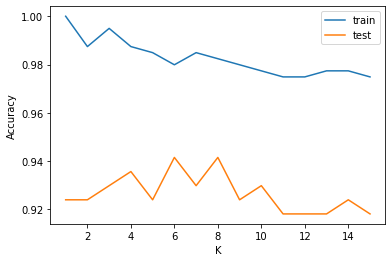

In [12]:
## 최근접 이웃 수 결정 
# 학습용 데이터의 분류 정확도
train_accuracy = []
# 테스트 데이터의 분류 정확도
test_accuracy = []

# 최근접 이웃의 수: 1~15
neighbors = range(1, 16)
for k in neighbors:
    # 모형화
    knn = KNeighborsClassifier(n_neighbors=k)
    # 학습 
    knn.fit(X_train_std, y_train)
    # 학습 데이터의 분류 정확도
    score = knn.score(X_train_std, y_train)
    train_accuracy.append(score)
    # 테스트 데이터의 분류 정확도
    score = knn.score(X_test_std, y_test)
    test_accuracy.append(score)

# K의 크기에 따른 분류 정확도 변화
plt.plot(neighbors, train_accuracy, label="train")
plt.plot(neighbors, test_accuracy,  label="test")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
# 테스트 데이터의 분류 정확도 
test_accuracy

[0.9239766081871345,
 0.9239766081871345,
 0.9298245614035088,
 0.935672514619883,
 0.9239766081871345,
 0.9415204678362573,
 0.9298245614035088,
 0.9415204678362573,
 0.9239766081871345,
 0.9298245614035088,
 0.9181286549707602,
 0.9181286549707602,
 0.9181286549707602,
 0.9239766081871345,
 0.9181286549707602]

In [14]:
# 모형화 
K = 6
knn = KNeighborsClassifier(n_neighbors=K)
# 학습 
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=6)

In [15]:
# 예측
y_pred = knn.predict(X_test_std)
print(y_pred)

[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1
 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0]


In [16]:
# confusion matrix 
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[ 56  10]
 [  0 105]]


In [17]:
# 테스트 데이터에 대한 정확도
knn.score(X_test_std, y_test)

0.9415204678362573